In [27]:
import numpy as np;
import time;
from RBComb.SerialBridge import *
from RBComb.RBComb576 import *
from RBComb.Helper.BoardPinout import *
from RBComb.Helper.BoardUnits import *;
from RBComb.Helper.FunctionInterpolator import *
import matplotlib.pyplot as plt;
%matplotlib inline

In [48]:
def testFunctionA(x):
    y = np.zeros(np.shape(x), dtype='float')
    for i in range(len(x)):
        y[i] = x[i]**2 + 0.0001
    return y

In [49]:
def testFunctionB(x):
    y = np.zeros(np.shape(x), dtype='float')
    for i in range(len(x)):
        y[i] = (1.-x[i])**2 + 0.0001
    return y

[    13     13     13 ... 131071 131075 131079]


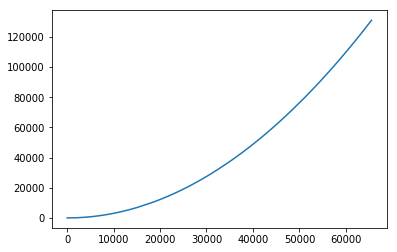

In [50]:
interpolator = FunctionInterpolator()
testFunAInterp = interpolator.performInterpolation(testFunctionA)
validate = interpolator.performValidation(testFunAInterp)
print(validate)
plt.plot(validate)

[131084 131079 131075 ...     13     13     13]


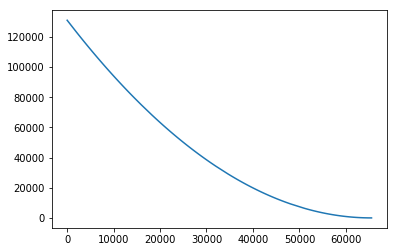

In [51]:
testFunBInterp = interpolator.performInterpolation(testFunctionB)
validate = interpolator.performValidation(testFunBInterp)
print(validate)
plt.plot(validate)

In [32]:
#bridge = SerialBridge('/dev/tty.usbserial-FT35HA60B', True, 300)
bridge = SerialBridge('/dev/tty.usbserial-FT3J6M59B', True, 300)
rbComb = RBComb576(bridge)

In [52]:
bridge.disableClock()
bridge.selectAllBoards()

In [53]:
for i in range(576):
    rbComb.setTaylorCoefficients(i,False,testFunAInterp)
    rbComb.setTaylorCoefficients(i,True,testFunBInterp)

In [54]:
units = BoardUnits()

sequenceLength = 4
sequenceOrder = [0,0,1,1]
sequenceAB = [0,1,1,0]
rbComb.setBraidingLength(sequenceLength)
rbComb.setBraidingOrder(sequenceOrder)
rbComb.setBraidingHold([0,0,0,0]) # Setting a 1 here allows to freeze the output for a step. Not used now.
rbComb.setBraidingAB(sequenceAB)
rbComb.setBraidingSpeed(units.convertBraidingDurationToIntegerSpeed(10e-3))
rbComb.setGain(True)

In [60]:
rbComb.outputRampUp()
rbComb.setCurrentState([0,0,0,0,0])
bridge.enableClock()
time.sleep(5)
bridge.disableClock()

In [61]:
rbComb.setNextState([0,0,0,0,1],units.convertTimeToSteps(100e-3))
rbComb.setBraidingFrame(0)

In [62]:
bridge.enableClock()
time.sleep(1)
bridge.disableClock()
rbComb.outputRampDown()
bridge.enableClock()
time.sleep(5)
bridge.disableClock()

In [26]:
bridge.closeConnection()